In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tdata = pd.read_csv("Train.csv")

/home/whirldata/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tdata_altered = tdata.fillna(value=-999,axis=1)

In [5]:
tdata.select_dtypes(include="object").columns

Index(['Col1', 'Col747', 'Col836'], dtype='object')

In [6]:
tdata["Col747"].unique()

array([nan, '-', '0', '1', 0.0, 5.0, '3'], dtype=object)

In [7]:
tdata['Col836'].unique()

array([nan, '-', '0', 0.0, '5'], dtype=object)

In [8]:
tdata['Col836'].value_counts()

0      438
-      144
0.0     41
5        1
Name: Col836, dtype: int64

In [10]:
tdata_altered["Col836"].value_counts()

-999    16897
0         438
-         144
0.0        41
5           1
Name: Col836, dtype: int64

In [14]:
y = tdata_altered["Col2"]
x = tdata_altered.drop("Col2",axis=1)

In [15]:
x.shape

(17521, 2394)

In [16]:
y.shape

(17521,)

In [13]:
for _c in tdata_altered.columns[tdata_altered.dtypes == "object"]:
    print(_c)
    tdata_altered[_c] = tdata_altered[_c].factorize()[0]

Col1
Col747
Col836


In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,class_weight="balanced_subsample")

In [19]:
rfc.fit(x,y)

/home/whirldata/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [20]:
rfc.feature_importances_

array([0.0688494 , 0.00739156, 0.00156633, ..., 0.00082139, 0.00093503,
       0.00191513])

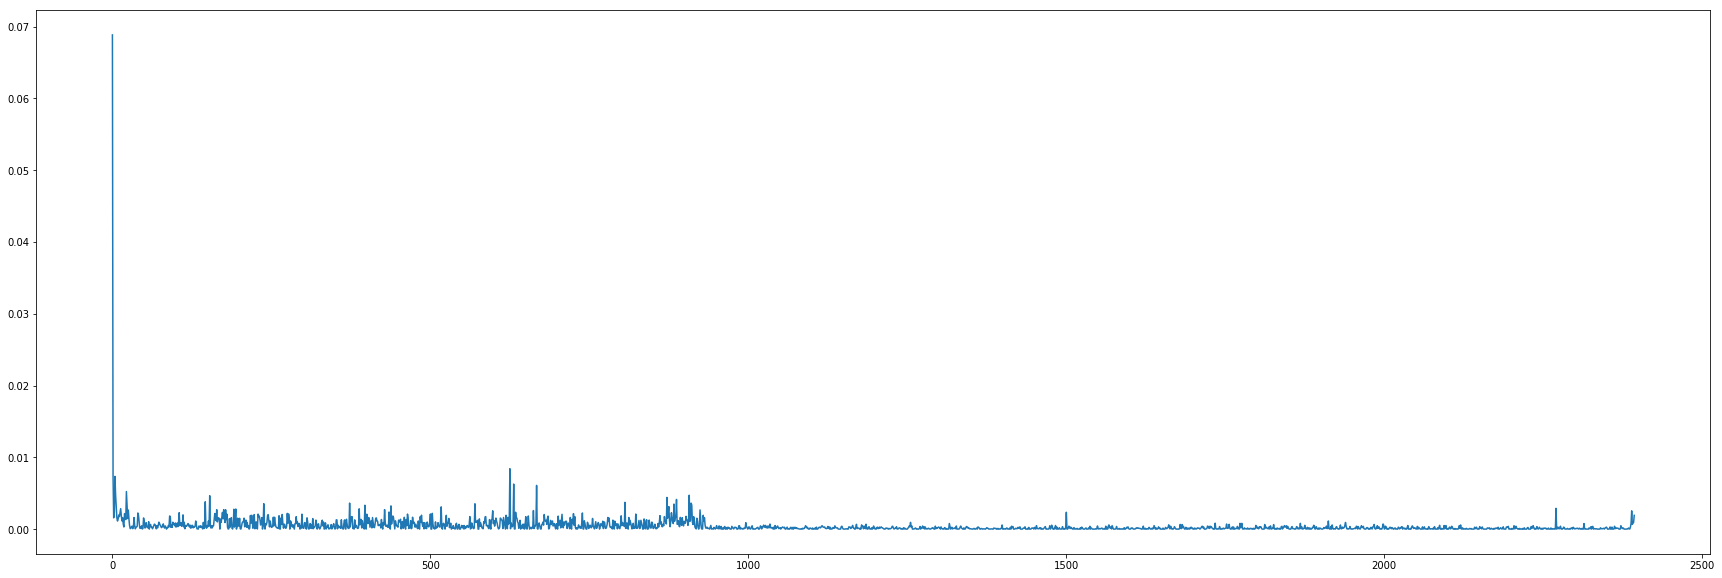

In [26]:
plt.figure(figsize=(30,10))
plt.plot(rfc.feature_importances_)